# NLP2024のタイトルをスクレイピングする

In [1]:
from bs4 import BeautifulSoup

import requests

In [2]:
url = "https://www.anlp.jp/proceedings/annual_meeting/2024/#session_list"

response = requests.get(url)

In [3]:
soup = BeautifulSoup(response.content, "html.parser")

In [4]:
selector =  """span.title"""

titles = [e.text for e in soup.select(selector)]

In [5]:
import yaml

with open("titles.yaml", "w") as f:
    yaml.dump(titles, f, allow_unicode=True, line_break=None, encoding="utf-8")

In [6]:
import unicodedata
import MeCab
import re

def mecab_tokenizer(text):
    replaced_text = unicodedata.normalize("NFKC",text)
    # replaced_text = replaced_text.upper()
    replaced_text = text.replace('大規模言語モデル', 'LLM')
    replaced_text = re.sub(r'[【】 () （） 『』　「」]', '' ,replaced_text) #【】 () 「」　『』の除去
    replaced_text = re.sub(r'[\[\［］\]]', ' ', replaced_text)   # ［］の除去
    replaced_text = re.sub(r'[@＠]\w+', '', replaced_text)  # メンションの除去
    # replaced_text = re.sub(r'\d+\.*\d*', '', replaced_text) #数字を0にする

    # 分けてノードごとにする
    tagger = MeCab.Tagger("")
    node = tagger.parseToNode(replaced_text)
    terms = []

    while node:
        # 単語
        term = node.surface
        # 品詞
        pos = node.feature.split(',')[0]
        # もし品詞が条件と一致してたら
        if pos in ["名詞"]:
            terms.append(term)
        # else:
        #     terms.append("")
        node = node.next

    #ひらがなのみの単語を除く
    kana_re = re.compile("^[ぁ-ゖ]+$")
    terms = [t for t in terms if not kana_re.match(t)]

    # 英語のみの単語を除く
    alphabet_re = re.compile("^[a-z]+$")
    terms = [t for t in terms if not alphabet_re.match(t)]

    return " ".join(terms)

In [7]:
tokens = " ".join([mecab_tokenizer(title) for title in titles])

In [8]:
tokens

'自然 言語 処理 基礎 デジタル ヒューマニティーズ 入門 日本 語 LLM 計算 社会 科学 入門 30 YearsofPerplexity 日本 語 研究 国立 国語 研究 E 3 P Linguistics JGLUE 日本 語 言語 理解 ベンチ マーク 定義 文 文 構成 法 人工 言語 事前 学習 言語 転移 知識 分析 基本 イベント 常識 推論 データ セット 構築 利用 市況 コメント 生成 少数 事例 選択 プロンプト チューニング kNN LM リスティング 広告 タイトル 自動 生成 複数 属性 評価 宿泊 施設 レビュー 返信 自動 生成 答案 診断 グラフ 国語 記述 式 答案 フィードバック 生成 クイズ 自動 生成 手法 検証 用語 制約 翻訳 手法 提案 Post E E A tionforMachineTranslation D tasetConstructionusingGPT 4 日本 語 琉球 諸語 翻訳 モデル 構築 重文 複文 翻訳 Transfomer 性質 言語 モデル 日英 対 訳文 集合 フィルタリング 手法 分析 LLM 検索 モデル 中間 学習 コーパス 作成 手法 テキスト 変換 リポジトリ レベル コード 検索 改善 クロス ドメイン 検索 質問 応答 ニューラル 疎 ベクトル 検索 Twitter データ ヘビー ユーザ 特定 レビュー 多角 有用 判別 分析 分類 モデル 構築 サンスクリット 文献 リグ ヴェーダ 韻律 構造 クラスタ 分析 語彙 密度 洗練 語彙 記憶 複数 諸相 国会 集団 語 発展 段階 分析 S T tionAcrossSoundEffectType F O oeiainJapaneseShonenManga VisualQuestionAnswering 視線 情報 質問 解消 SNS 絵 文字 位置 パターン 分析 Levenshtein 距離 サンプル 抽出 基盤 モデル 古典 プランニング レシピ 記述 世界 調理 計画 認識 実行 ロボット システム 世界 対話 フレーズグラウンディングモデル 評価 分析 都市 環境 歩行 支援 画像 説明 文 生成 データ セット 作成 話し言葉 副詞 生起 位置 係り先 距離 関係 F LatentDirichletAlloc

In [9]:
# ワードクラウドによる頻出単語の可視化
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#日本語のフォントを指定する
font = 'ipag.ttf'

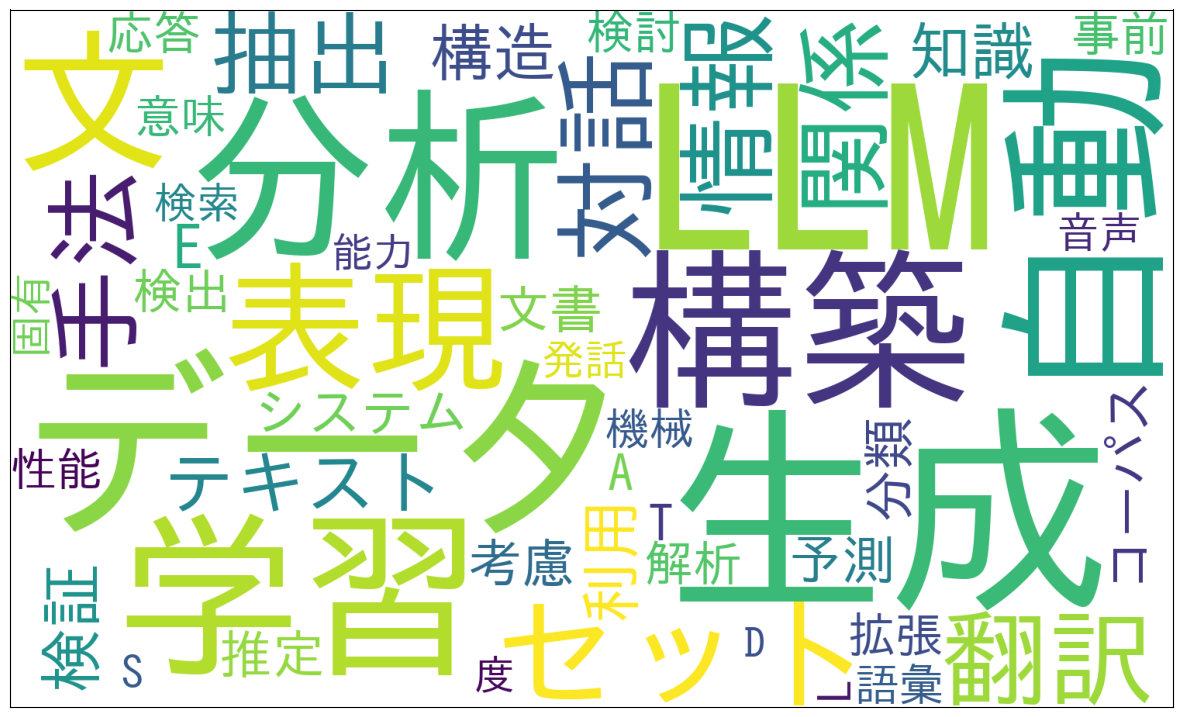

In [10]:
#意味なさそうな単語（ストップワード）を除去する。
stop_words = ["言語", "処理", "日本", "評価", "語", "モデル"]

#WordCloudを表示
word_cloud = WordCloud(
    font_path=font,
    width=1500,
    height=900,
    stopwords=set(stop_words),
    min_font_size=5,
    collocations=False,
    background_color='white',
    max_words=50
).generate(tokens)
figure = plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.tick_params(labelbottom=False, labelleft=False)
plt.xticks([])
plt.yticks([])
plt.show()